In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


## Viewing Static XES Spectra

Processing: 100%|██████████| 60/60 [01:01<00:00,  1.03s/Shot_Batch]


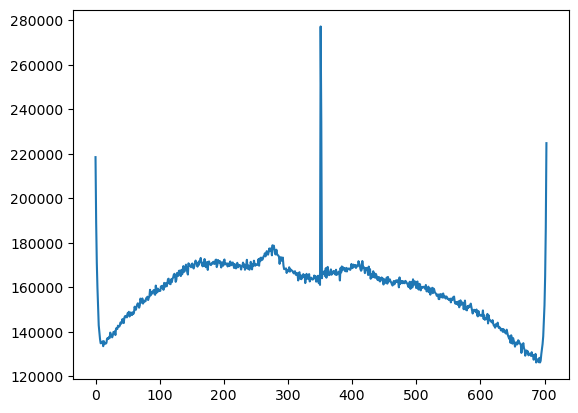

In [52]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[40,170]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['45-56'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)


In [53]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')


In [54]:
v.summed_xes

array([[1724.0631, 1787.8049, 1762.1638, ..., 1998.1206, 2196.0806,
        1961.7091],
       [1505.0308, 1552.7672, 1409.6218, ..., 1851.2529, 1681.148 ,
        1784.5692],
       [1467.7704, 1212.2716, 1296.6497, ..., 1568.0497, 1517.4283,
        1472.9081],
       ...,
       [1454.1235, 1315.1495, 1305.1753, ..., 1736.5493, 1606.727 ,
        1608.181 ],
       [1606.6643, 1714.1798, 1589.829 , ..., 1757.0212, 1716.4441,
        1838.6627],
       [1956.3848, 1759.0979, 1718.8379, ..., 2100.503 , 2036.4017,
        2046.6978]], dtype=float32)

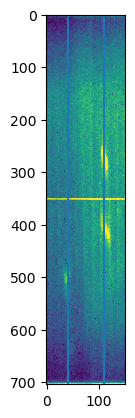

In [55]:
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
plt.axvline(40)
plt.axvline(110)

Processing: 100%|██████████| 90/90 [00:51<00:00,  1.75Shot_Batch/s]


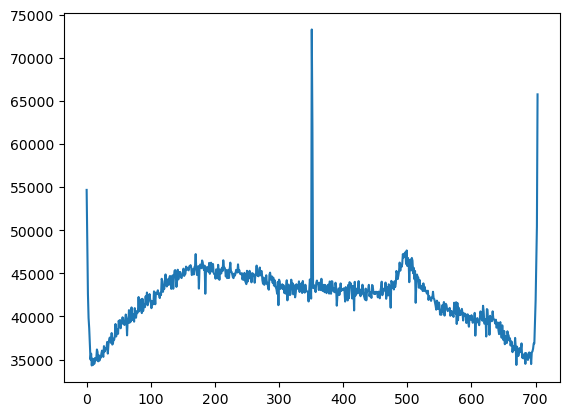

In [74]:
#Fe k-alpha
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[30,50]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['41-58'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)
run3_Fe=v.summed_xes

In [75]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
v.summed_xes

array([[2833.5693, 2862.4636, 2691.328 , ..., 3078.831 , 3293.0725,
        3183.3489],
       [2198.7551, 2370.029 , 2206.0706, ..., 2765.0293, 2685.237 ,
        2781.8845],
       [2094.0322, 1923.7998, 2157.4238, ..., 2339.1084, 2321.3748,
        2421.5444],
       ...,
       [2185.9082, 2120.286 , 2090.6794, ..., 2461.5125, 2265.4927,
        2407.3267],
       [2434.717 , 2672.0305, 2514.1384, ..., 2744.3481, 2639.6306,
        2784.3916],
       [2958.7896, 2765.0159, 2720.4722, ..., 3246.7954, 3037.5203,
        3167.1133]], dtype=float32)

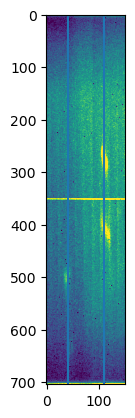

In [76]:
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
plt.axvline(40)
plt.axvline(110)

In [ ]:
#Cu k-alpha line
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[90,120]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['41-58'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)
run3_Cu=v.summed_xes

Processing:  83%|████████▎ | 75/90 [00:45<00:04,  3.20Shot_Batch/s]

In [ ]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
v.summed_xes

In [ ]:
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
#plt.imshow(xes.analyzed_runs[0].epix_summed)
plt.axvline(111)
plt.axvline(64)

Processing: 100%|██████████| 1/1 [00:01<00:00,  1.63s/Shot_Batch]


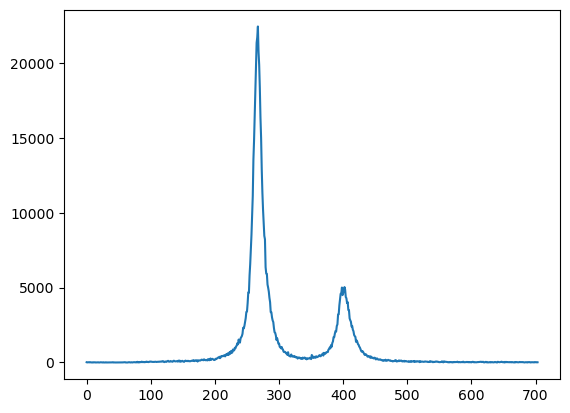

In [72]:
#Cu k-alpha line
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[125,145]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['24'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)
run3_Cu=v.summed_xes

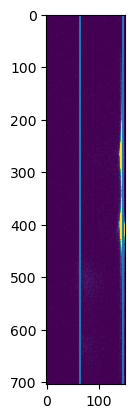

In [73]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
v.summed_xes
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
#plt.imshow(xes.analyzed_runs[0].epix_summed)
plt.axvline(146)
plt.axvline(64)

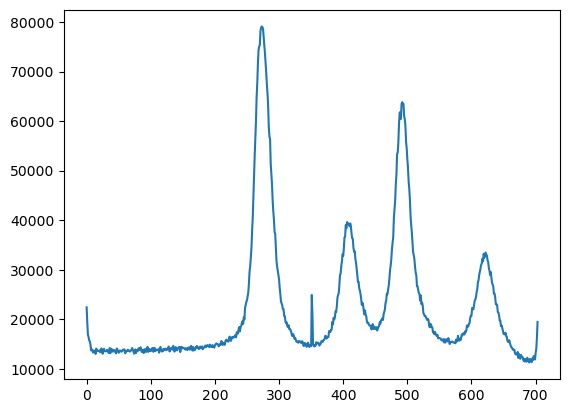

In [6]:
plt.plot(xes.analyzed_runs[0].epix_ROI_1_summed)

In [ ]:
#in a pinch normalization
#plt.plot((run3_Fe-np.min(run3_Fe)/np.max(run3_Fe))

In [11]:
xes.status

['Parsing run array.',
 'Starting parallel analysis with shot ranges.',
 'Parsing run shots.',
 'Run shots parsed.',
 'Breaking into shot ranges with increment 2000.',
 'Shot ranges broken.',
 'Parallel analysis with shot ranges completed.',
 'Parallel analysis completed.',
 'Total time: 14.31 seconds.',
 'Parallel time (processing): 14.31 seconds.',
 'Time per batch (on average): 1.43 seconds.',
 'Time per core (on average): 3.58 seconds.',
 'Batches per core (on average): 2.50.',
 'Read bytes: 0.02 MB.',
 'Write bytes: 387.70 MB.',
 'Memory used: 132.73 MB.']

<font size=5>XES Analysis and Visualization Test</br>With ROTATION</font>

In [4]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1027922',lcls_run=22)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
keys=['tt/ttCorr','epics/lxt', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL'] 
names=['time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl']
#Here we define the epix detector keys separately as they are imported separately to avoid OOM
xes.key_epix=[r'epix_2/ROI_0_area']
xes.friendly_name_epix=['epix']
##
xes.set_key_aliases(keys,names)
#xes.end_index=5000
xes.mintime=-0.9
xes.maxtime=0.9
xes.numpoints=40
xes.time_bins=np.linspace(xes.mintime,xes.maxtime,xes.numpoints)
xes.rois=[[0,50]]
xes.adu_cutoff=3.0
xes.angle=90
xes.lxt_key=None
xes.transpose=True
#xes.add_filter('xray','ipm4',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
xes.add_filter('simultaneous','time_tool_ampl',0.05)
xes.run_parser(['44-46'])
#pixels.pat

In [5]:
start=time.time()
xes.primary_analysis_parallel_range(8,xes_experiment,increment=1000,verbose=False)
end=time.time()

Processing: 100%|██████████| 30/30 [01:48<00:00,  3.63s/Shot_Batch]


In [6]:
xes.status

['Setting key aliases.',
 'Adding filter: Shot Type=simultaneous, Filter Key=time_tool_ampl, Threshold=0.05',
 'Parsing run array.',
 'Starting parallel analysis with shot ranges.',
 'Parsing run shots.',
 'Run shots parsed.',
 'Breaking into shot ranges with increment 1000.',
 'Shot ranges broken.',
 'Parallel analysis completed.',
 'Total time: 108.94 seconds.',
 'Parallel time (processing): 108.91 seconds.',
 'Time per batch (on average): 3.63 seconds.',
 'Time per core (on average): 13.61 seconds.',
 'Batches per core (on average): 3.75.']

(-0.8, 0.8)

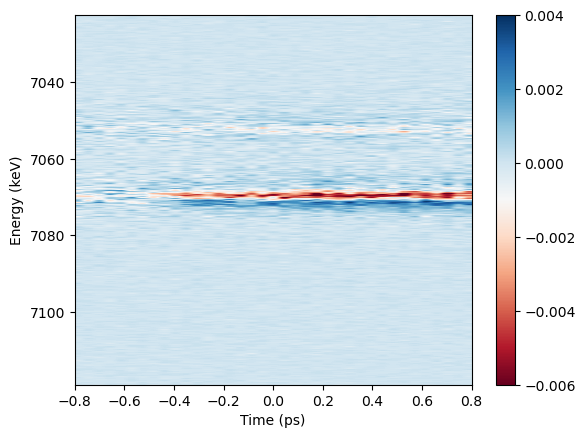

In [7]:
v=XSpect.XSpect_Visualization.XESVisualization()

v.combine_spectra(xes_analysis=xes,xes_key='epix_xray_not_laser_time_binned_ROI_1',xes_laser_key='epix_simultaneous_laser_time_binned_ROI_1')
v.vmin=-0.006
v.vmax=0.004
#xes.analyzed_runs[0].kbeta_energy=np.linspace(6430,6370,len(xes.analyzed_runs[0].kbeta_energy))
v.plot_2d_difference_spectrum(xes)
plt.xlim(-0.8,0.8)
#plt.ylim(7075,7065)

In [8]:
diff=np.abs(xes.summed_laser_on_normalized-xes.summed_laser_off_normalized)

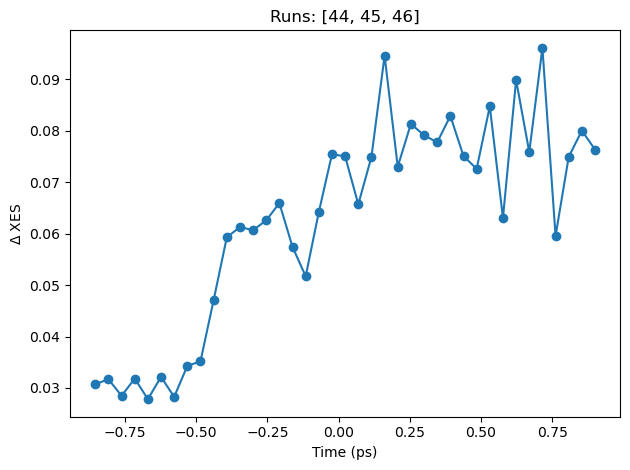

In [9]:
plt.title(f'Runs: %s' % xes.runs)
plt.plot(xes.time_bins[1:],np.nansum(diff[2:,340:368],axis=1),'o-')
plt.xlabel('Time (ps)')
plt.ylabel('$\Delta$ XES')
plt.tight_layout()

In [10]:
def error_function(x, a, b, c, d):
    return a * (1 + scipy.special.erf(b * (x - c))) + d
def gaussian(x, amplitude, center, fwhm, offset):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2)) + offset

from scipy.optimize import curve_fit
import scipy
bins_center=xes.time_bins[1:]
norm_epix=np.nansum(diff[2:,340:368],axis=1)
initial_guess = [np.max(norm_epix), 0.003, np.mean(bins_center), np.min(norm_epix)]  # Initial guess for the parameters
params, covariance = curve_fit(error_function, bins_center, norm_epix, p0=initial_guess,maxfev=99999999)

/sdf/group/lcls/ds/ana/sw/conda1/inst/envs/ana-4.0.62-py3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


SVD Reconstruction performed with 2 components


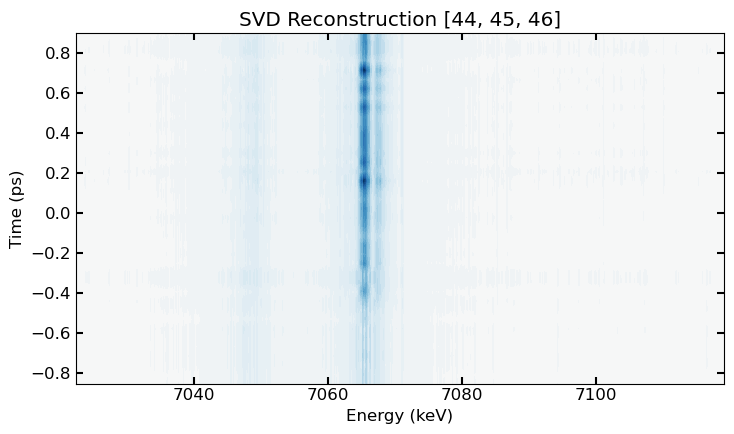

In [11]:
import XSpect.XSpect_PostProcessing
ana = XSpect.XSpect_PostProcessing.post_analysis()
nsvd = 2
diff_svd = ana.svdreconstruct(diff[2:], nsvd)
plotmax = np.max(np.abs(diff_svd))
contlevels = np.linspace(-plotmax, plotmax, 50)
plt.contourf(xes.analyzed_runs[0].kbeta_energy, xes.time_bins[1:], diff_svd, contlevels, cmap = 'RdBu')
plt.title(f'SVD Reconstruction {xes.runs}')

plt.xlabel('Energy (keV)')
plt.ylabel('Time (ps)')
plt.tight_layout()
plt.savefig(f'SVD Reconstruction {xes.runs}.jpg')

Text(0.5, 0, 'Time (ps)')

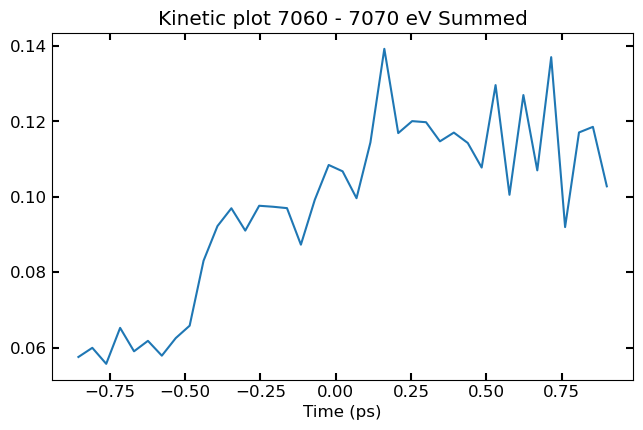

In [12]:
# en_kin_min, en_kin_max = 7.124, 7.126

# indx_min = np.argmin(np.abs(xas.ccm_bins - en_kin_min))
# indx_max = np.argmin(np.abs(xas.ccm_bins - en_kin_max))
# kintrace = np.nanmean(diff_svd[:,indx_min:indx_max], axis=1)
# plt.plot(xas.time_bins, kintrace)

low=7060
hi=7070

low_e=np.argmin(np.abs(xes.analyzed_runs[0].kbeta_energy-low))
hi_e=np.argmin(np.abs(xes.analyzed_runs[0].kbeta_energy-hi))
kintrace = np.nansum(diff_svd[:,hi_e:low_e],axis=1)
plt.plot(xes.time_bins[1:], kintrace)

plt.title(f'Kinetic plot {low} - {hi} eV Summed')
plt.xlabel('Time (ps)')